<a href="https://colab.research.google.com/github/Angelawork/Sportify_EA-Sports-Player-Performance-Evaluator/blob/main/Sportify_EA_Sports_Player_Performance_Evaluator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ever wondered how your favourite soccer players would perform on the field? Enter Sportify, the revolutionary AI-driven platform behind the scenes. Fuelled by our passion for soccer, we've meticulously crafted this platform to bridge the gap between data-driven insights and the thrill of the game.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,confusion_matrix

In [ ]:
df1 = pd.read_csv("/content/male_players.csv")

In [ ]:
target_version=22.0
df_future=df1.loc[df1['fifa_version'] == target_version]
df=df1.loc[df1['fifa_version'] == target_version-1]
df_future=df_future.sort_values(by='long_name').reset_index(drop=True)
df=df.sort_values(by='long_name').reset_index(drop=True)

merged_df = pd.merge(df, df_future, on='player_id', suffixes=('_year1', '_year2'))

In [ ]:
merged_df

,player_id,player_url_year1,fifa_version_year1,fifa_update_year1,update_as_of_year1,short_name_year1,long_name_year1,player_positions_year1,overall_year1,potential_year1,...,ldm_year2,cdm_year2,rdm_year2,rwb_year2,lb_year2,lcb_year2,cb_year2,rcb_year2,rb_year2,gk_year2
0,230212,https://sofifa.com/player/230212/a-benjamin-ch...,21.0,2.0,2020-09-23,Zervandro,A. Zervandro Chiamuloira Paes,"CB, LB",78,78,...,73+2,73+2,73+2,70+2,72+2,78,78,78,72+2,18+2
1,234290,https://sofifa.com/player/234290/aapo-halme/21...,21.0,2.0,2020-09-23,A. Halme,Aapo Halme,"CB, CDM",65,75,...,62+2,62+2,62+2,56+2,57+2,65+2,65+2,65+2,57+2,17+2
2,257496,https://sofifa.com/player/257496/aaron-anderso...,21.0,2.0,2020-09-23,A. Anderson,Aaron Anderson,CB,53,65,...,53+2,53+2,53+2,49+2,51+2,57+2,57+2,57+2,51+2,12+2
3,237286,https://sofifa.com/player/237286/aaron-connoll...,21.0,2.0,2020-09-23,A. Connolly,Aaron Anthony Connolly,ST,70,77,...,44+2,44+2,44+2,46+2,43+2,39+2,39+2,39+2,43+2,18+2
4,218353,https://sofifa.com/player/218353/aaron-appinda...,21.0,2.0,2020-09-23,A. Appindangoye,Aaron Appindangoye,CB,68,69,...,65+2,65+2,65+2,63+2,64+2,69,69,69,64+2,14+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13262,211002,https://sofifa.com/player/211002/seok-ho-hwang...,21.0,2.0,2020-09-23,Hwang Seok Ho,황석호 黄锡浩,"CB, LB",65,65,...,64+2,64+2,64+2,62+2,62+2,67,67,67,62+2,18+2
13263,207836,https://sofifa.com/player/207836/soon-min-hwan...,21.0,2.0,2020-09-23,Hwang Soon Min,황순민 金胜敏,"CM, LM",63,63,...,59+2,59+2,59+2,60+2,58+2,56+2,56+2,56+2,58+2,15+2
13264,212260,https://sofifa.com/player/212260/ui-jo-hwang/2...,21.0,2.0,2020-09-23,Hwang Ui Jo,황의조 Ui Jo Hwang,"ST, CF, LM",73,73,...,57+2,57+2,57+2,60+2,58+2,54+2,54+2,54+2,58+2,17+2
13265,222660,https://sofifa.com/player/222660/hyun-soo-hwan...,21.0,2.0,2020-09-23,Hwang Hyun Soo,황현수 黄贤秀,CB,66,70,...,56+2,56+2,56+2,55+2,59+2,65+2,65+2,65+2,59+2,15+2


In [ ]:
merged_df= merged_df.drop_duplicates()

#columns_to_keep = ['pace_year1', 'shooting_year1', 'attacking_crossing_year1', 'attacking_finishing_year1', 'attacking_heading_accuracy_year1', 'attacking_short_passing_year1']
columns_to_keep =["fifa_version_year1", "overall_year2", "potential_year1", 'value_eur_year1',"wage_eur_year1",
                  "age_year1", "height_cm_year1", "weight_kg_year1", "club_team_id_year1",
                  "league_id_year1", "league_level_year1", "nation_team_id_year1", "mentality_vision_year1"]

merged_df = merged_df[columns_to_keep]
merged_df=merged_df.dropna(axis=0)

In [ ]:
merged_df.dtypes

fifa_version_year1        float64
overall_year1               int64
overall_year2               int64
potential_year1             int64
value_eur_year1           float64
wage_eur_year1            float64
age_year1                   int64
height_cm_year1             int64
weight_kg_year1             int64
club_team_id_year1        float64
league_id_year1           float64
league_level_year1        float64
nation_team_id_year1      float64
mentality_vision_year1      int64
dtype: object

In [ ]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean[columns_to_keep] = scaler.fit_transform(df_clean[columns_to_keep])'''

<ipython-input-296-1d2250fe20c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[columns_to_keep] = scaler.fit_transform(df_clean[columns_to_keep])


In [ ]:
X=merged_df.drop("overall_year2",axis=1)
y=merged_df["overall_year2"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=24)

In [ ]:
#from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=34)

model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error

def perdict(model,X_test,y_test):
  predictions = model.predict(X_test)

  mae = mean_absolute_error(y_test, predictions)
  print(predictions[:10])
  print(f'Mean Absolute Error: {mae}')
  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_test, predictions)
  print(f'Mean Squared Error: {mse:.2f}')
  rmse = np.sqrt(mse)
  print(f'Root Mean Squared Error: {rmse:.2f}')

perdict(model,X_test,y_test)

[74.76 81.27 70.72 77.01 71.52 77.53 67.67 74.78 75.99 71.82]
Mean Absolute Error: 1.5864539007092198
Mean Squared Error: 4.11
Root Mean Squared Error: 2.03


In [ ]:
!pip install joblib

In [ ]:
import joblib

joblib.dump(model, 'random_forest_model.pkl')
from google.colab import files
files.download('random_forest_model.pkl')

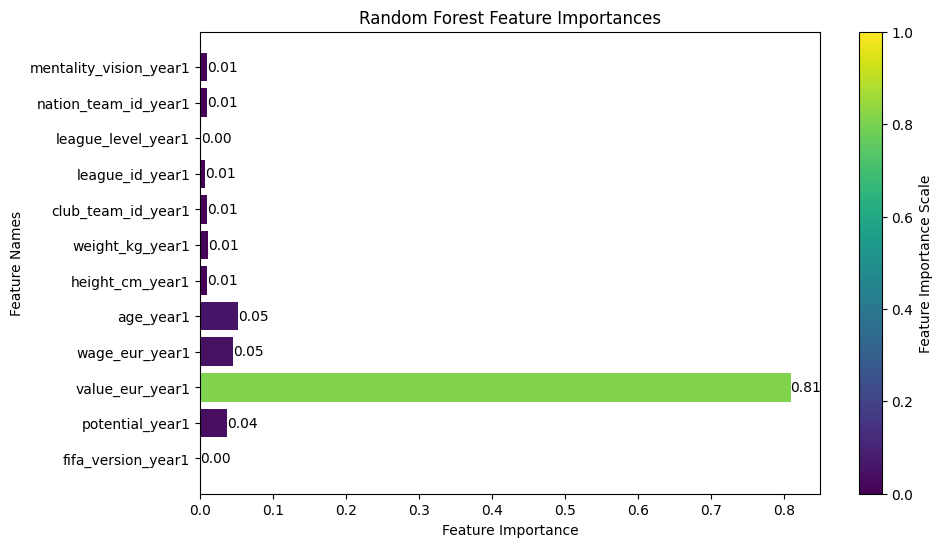

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

feature_importances = model.feature_importances_
feature_names = X_train.columns

colormap = get_cmap('viridis')
colors = [colormap(i) for i in feature_importances]

plt.figure(figsize=(10, 6))
bars = plt.barh(feature_names, feature_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Random Forest Feature Importances')


sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Feature Importance Scale')

for bar, importance in zip(bars, feature_importances):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '{:.2f}'.format(importance),
             va='center', ha='left', fontsize=10)

plt.show()



#search for input data

In [ ]:
import pandas as pd
import pickle

df = pd.read_csv('male_players.csv')
model = joblib.load("/content/random_forest_model (1).pkl")

#input for model
eg.Glenn James Morris

Rakan Al Kaabi

Christian Bos

Shahruddin Magomedaliyev

Josh Keyes


In [ ]:
def get_prediction(number):
  work_rate=[]
  output=[]
  for _ in range(number):
    player_name = input("Enter the player's name: ").strip()
    if player_name in df['long_name'].values:
        player_data = df.loc[df['long_name'] == player_name, ['fifa_version', 'overall', 'potential', 'value_eur',
                                                                'wage_eur', 'age', 'height_cm', 'weight_kg',
                                                                'club_team_id', 'league_id', 'league_level',
                                                                'nation_team_id', 'mentality_vision',
                                                                'power_stamina', 'work_rate']]

    else:
        print("Player not found in the database.")
        continue

    df_temp=player_data[player_data['fifa_version']==24.0]
    df_temp.fillna(0, inplace=True)
    df_temp.columns = ['fifa_version_year1', 'overall_year1', 'potential_year1', 'value_eur_year1', 'wage_eur_year1', 'age_year1',
          'height_cm_year1', 'weight_kg_year1', 'club_team_id_year1', 'league_id_year1', 'league_level_year1',
          'nation_team_id_year1', 'mentality_vision_year1', 'power_stamina_year1', 'work_rate']
    X=df_temp.drop(['work_rate','power_stamina_year1'],axis=1)
    prediction = model.predict(X)
    output.append(prediction)
    work_rate.append(player_data['work_rate'].tolist())

  output= [array.tolist() for array in output]
  output=[item for sublist in output for item in sublist]
  return output,work_rate

In [ ]:
output,work_rate=get_prediction(3)
print(output,work_rate)

Enter the player's name: Glenn James Morris


<ipython-input-561-ef729b47b421>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.fillna(0, inplace=True)


Enter the player's name: Rakan Al Kaabi
Enter the player's name: Josh Keyes
[62.07, 62.47, 59.62] [['Medium/Medium', 'Medium/Medium', 'Medium/Medium', 'Medium/Medium', 'Medium/Medium', 'Medium/Medium', 'Medium/Medium', 'Medium/Medium', 'Medium/Medium', 'Medium/Medium'], ['Low/High'], ['High/Medium']]


# search algorithm + output model prediction + output work_rate, taking inputs as a list of names


In [ ]:
def get_prediction(inputs):
  work_rate=[]
  output=[]
  for i in range(len(inputs)):
    player_name = inputs[i].strip()
    if player_name in df['long_name'].values:
        player_data = df.loc[df['long_name'] == player_name, ['fifa_version', 'overall', 'potential', 'value_eur',
                                                                'wage_eur', 'age', 'height_cm', 'weight_kg',
                                                                'club_team_id', 'league_id', 'league_level',
                                                                'nation_team_id', 'mentality_vision',
                                                                'power_stamina', 'work_rate']]

    else:
        print("Player not found in the database.")
        continue

    df_temp=player_data[player_data['fifa_version']==24.0]
    df_temp.fillna(0, inplace=True)
    df_temp.columns = ['fifa_version_year1', 'overall_year1', 'potential_year1', 'value_eur_year1', 'wage_eur_year1', 'age_year1',
          'height_cm_year1', 'weight_kg_year1', 'club_team_id_year1', 'league_id_year1', 'league_level_year1',
          'nation_team_id_year1', 'mentality_vision_year1', 'power_stamina_year1', 'work_rate']
    X=df_temp.drop(['work_rate','power_stamina_year1'],axis=1)
    prediction = model.predict(X)
    output.append([player_name,prediction])
    work_rate.append(player_data['work_rate'].tolist())
  for sublist in output:
    sublist[1] = float(sublist[1][0])
  result_string = '\n'.join(['{} {}'.format(sublist[0], sublist[1]) for sublist in output])
  #output= [array.tolist() for array in output]
  #output=[item for sublist in output for item in sublist]
  return result_string

# random sketch below


In [ ]:

get_prediction(['Glenn James Morris','Rakan Al Kaabi','Christian Bos','Shahruddin Magomedaliyev','Josh Keyes'])

<ipython-input-50-60e01c47a937>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.fillna(0, inplace=True)


'Glenn James Morris 62.07\nRakan Al Kaabi 62.47\nChristian Bos 61.06\nShahruddin Magomedaliyev 70.48\nJosh Keyes 59.62'

In [ ]:
pip install gradio scikit-learn

In [ ]:
import gradio as gr
import pickle
from sklearn.ensemble import RandomForestRegressor

iface = gr.Interface(fn=get_prediction, inputs='text', outputs="text")

# Launch the Gradio interface
iface.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("K Nearest Neghbours", KNeighborsClassifier(n_neighbors=2))
]

results = {}

for model_name, model in models:
    print(f"model_name: {model_name}")
    print("test accuracy: {} ".format(model.fit(x_train, y_train).score(x_test, y_test)))
    print("train accuracy: {} ".format(model.fit(x_train, y_train).score(x_train, y_train)))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("K Nearest Neghbours", KNeighborsClassifier(n_neighbors=2))
]

results = {}

for model_name, model in models:
    print(f"model_name: {model_name}")
    print("test accuracy: {} ".format(model.fit(x_train, y_train).score(x_test, y_test)))
    print("train accuracy: {} ".format(model.fit(x_train, y_train).score(x_train, y_train)))


In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [ ]:
y_pred = model .fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test,y_pred)

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['stroke','not_stroke']); ax.yaxis.set_ticklabels(['stroke','not_stroke']);

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'